In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Carga data y creación Dataframe

In [3]:
data = pd.read_csv(r'.\Datos\dataset_mercado_publico.csv', delimiter=';')
data.head()

,Tender_id,Item_Key,Rubro1,Rubro2,Rubro3,Nombre linea Adquisicion,Descripcion linea Adquisicion,Kupfer
0,2792-88-LE21,2792-88-LE21-1,Equipamiento y suministros médicos,Productos quirúrgicos,"Equipo quirúrgico, accesorios y productos rela...",Equipo quirúrgico de fragmatome retinal vítreo...,CÁMARA RETINAL NO MIDRIÁTICA - ESPECIFICACIONE...,0
1,1704-52-LP21,1704-52-LP21-1,"Servicios de transporte, almacenaje y correo",Transporte de correo y carga,Transporte de carga por carretera,Servicios de transporte local en camión,SERVICIO DE MUDANZA DE ENSERES PROPIOS Y EN US...,0
2,1003-20-L121,1003-20-L121-1,"Productos derivados de minerales, plantas y an...",Chatarra y desechos no metálicos,Desechos no metálicos,Desperdicios o restos de madera,LEÑA SECA CERTIFICADA,0
3,903556-3-LP21,903556-3-LP21-1,"Tecnologías de la información, telecomunicacio...",Software,Software de administración de redes,Software de administración,NaN,0
4,4236-21-L121,4236-21-L121-1,"Equipos, accesorios y suministros de oficina",Suministros de oficina,Instrumentos de escritura,Marcadores,MARCADOR BLANCO PARA METALES,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54962 entries, 0 to 54961
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Tender_id                      54962 non-null  object
 1   Item_Key                       54962 non-null  object
 2   Rubro1                         54962 non-null  object
 3   Rubro2                         54962 non-null  object
 4   Rubro3                         54962 non-null  object
 5   Nombre linea Adquisicion       54962 non-null  object
 6   Descripcion linea Adquisicion  54849 non-null  object
 7   Kupfer                         54962 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 3.4+ MB


In [14]:
data[['Item_Key']].sort_values('Item_Key', ascending=True)

,Item_Key
10235,1000-26-LE21-1
10236,1000-26-LE21-2
54368,1000-34-LE21-2
54346,1000-34-LE21-3
10237,1000813-41-LE21-1
...,...
8405,999-73-L121-5
8406,999-73-L121-7
8407,999-73-L121-8
10028,999-74-LE21-1


In [63]:
df = data.copy()
df = df.rename(columns={'Tender_id':'id_licitacion','Item_Key':'id_producto','Nombre linea Adquisicion':'nombre_producto','Descripcion linea Adquisicion':'descripcion','Kupfer':'label'})
df.head()

,id_licitacion,id_producto,Rubro1,Rubro2,Rubro3,nombre_producto,descripcion,label
0,2792-88-LE21,2792-88-LE21-1,Equipamiento y suministros médicos,Productos quirúrgicos,"Equipo quirúrgico, accesorios y productos rela...",Equipo quirúrgico de fragmatome retinal vítreo...,CÁMARA RETINAL NO MIDRIÁTICA - ESPECIFICACIONE...,0
1,1704-52-LP21,1704-52-LP21-1,"Servicios de transporte, almacenaje y correo",Transporte de correo y carga,Transporte de carga por carretera,Servicios de transporte local en camión,SERVICIO DE MUDANZA DE ENSERES PROPIOS Y EN US...,0
2,1003-20-L121,1003-20-L121-1,"Productos derivados de minerales, plantas y an...",Chatarra y desechos no metálicos,Desechos no metálicos,Desperdicios o restos de madera,LEÑA SECA CERTIFICADA,0
3,903556-3-LP21,903556-3-LP21-1,"Tecnologías de la información, telecomunicacio...",Software,Software de administración de redes,Software de administración,NaN,0
4,4236-21-L121,4236-21-L121-1,"Equipos, accesorios y suministros de oficina",Suministros de oficina,Instrumentos de escritura,Marcadores,MARCADOR BLANCO PARA METALES,0


In [9]:
df.index = df['id_producto']
df.head()

,id_licitacion,id_producto,Rubro1,Rubro2,Rubro3,nombre_producto,descripcion,label
id_producto,,,,,,,,
2792-88-LE21-1,2792-88-LE21,2792-88-LE21-1,Equipamiento y suministros médicos,Productos quirúrgicos,"Equipo quirúrgico, accesorios y productos rela...",Equipo quirúrgico de fragmatome retinal vítreo...,CÁMARA RETINAL NO MIDRIÁTICA - ESPECIFICACIONE...,0
1704-52-LP21-1,1704-52-LP21,1704-52-LP21-1,"Servicios de transporte, almacenaje y correo",Transporte de correo y carga,Transporte de carga por carretera,Servicios de transporte local en camión,SERVICIO DE MUDANZA DE ENSERES PROPIOS Y EN US...,0
1003-20-L121-1,1003-20-L121,1003-20-L121-1,"Productos derivados de minerales, plantas y an...",Chatarra y desechos no metálicos,Desechos no metálicos,Desperdicios o restos de madera,LEÑA SECA CERTIFICADA,0
903556-3-LP21-1,903556-3-LP21,903556-3-LP21-1,"Tecnologías de la información, telecomunicacio...",Software,Software de administración de redes,Software de administración,NaN,0
4236-21-L121-1,4236-21-L121,4236-21-L121-1,"Equipos, accesorios y suministros de oficina",Suministros de oficina,Instrumentos de escritura,Marcadores,MARCADOR BLANCO PARA METALES,0


In [64]:
df.drop(columns=['id_licitacion','id_producto','Rubro2','Rubro3'], inplace=True)
df.head()

,Rubro1,nombre_producto,descripcion,label
0,Equipamiento y suministros médicos,Equipo quirúrgico de fragmatome retinal vítreo...,CÁMARA RETINAL NO MIDRIÁTICA - ESPECIFICACIONE...,0
1,"Servicios de transporte, almacenaje y correo",Servicios de transporte local en camión,SERVICIO DE MUDANZA DE ENSERES PROPIOS Y EN US...,0
2,"Productos derivados de minerales, plantas y an...",Desperdicios o restos de madera,LEÑA SECA CERTIFICADA,0
3,"Tecnologías de la información, telecomunicacio...",Software de administración,NaN,0
4,"Equipos, accesorios y suministros de oficina",Marcadores,MARCADOR BLANCO PARA METALES,0


# Análisis Data

In [66]:
df['Rubro1'].value_counts()/len(df) # distribución de casos según rubro 1 de mercado publico

Medicamentos y productos farmacéuticos                                                                     0.308304
Equipamiento y suministros médicos                                                                         0.069812
Herramientas y maquinaria en general                                                                       0.051126
Artículos de fabricación y producción                                                                      0.048361
Salud, servicios sanitarios y alimentación                                                                 0.045013
Equipos y suministros de defensa, orden público, protección y seguridad                                    0.042520
Equipos, accesorios y suministros de oficina                                                               0.038063
Alimentos, bebidas y tabaco                                                                                0.031968
Artículos para estructuras, obras y construcciones                      

In [67]:
df.groupby('label').size()/len(df)  # balance de labels

label
0    0.89087
1    0.10913
dtype: float64

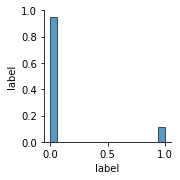

In [85]:
#fig, ax = plt.subplots(figsize=(10,6))
sns.pairplot(df) #En la diagonal aparece el histograma y en los demás gráficas una gráfica de dispersión
plt.show()

<AxesSubplot:xlabel='count', ylabel='Rubro1'>

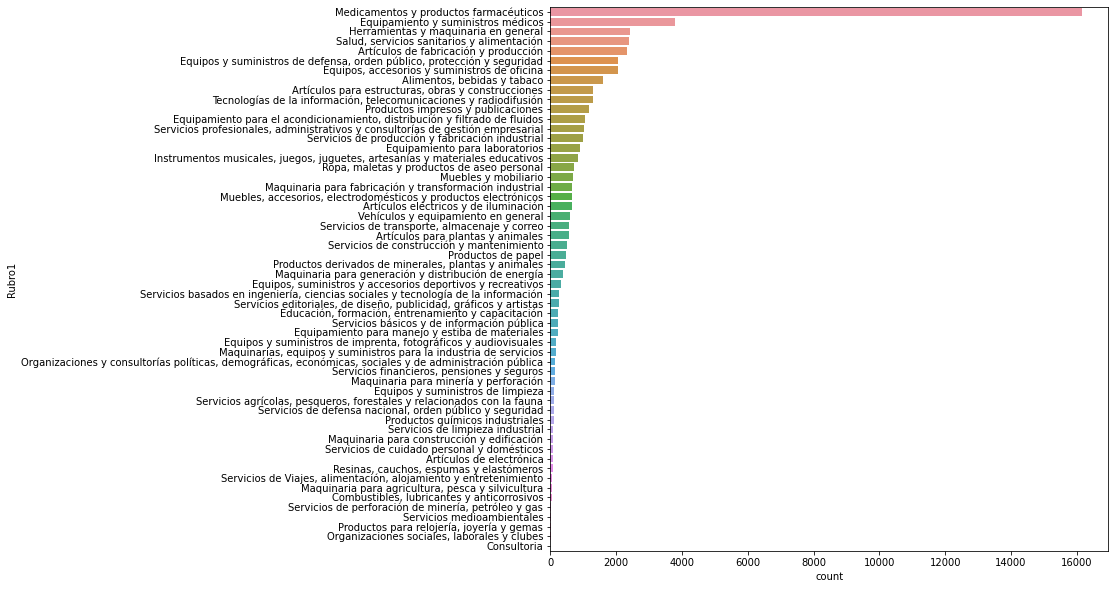

In [95]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(y= df['Rubro1'], order = df['Rubro1'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='Rubro1'>

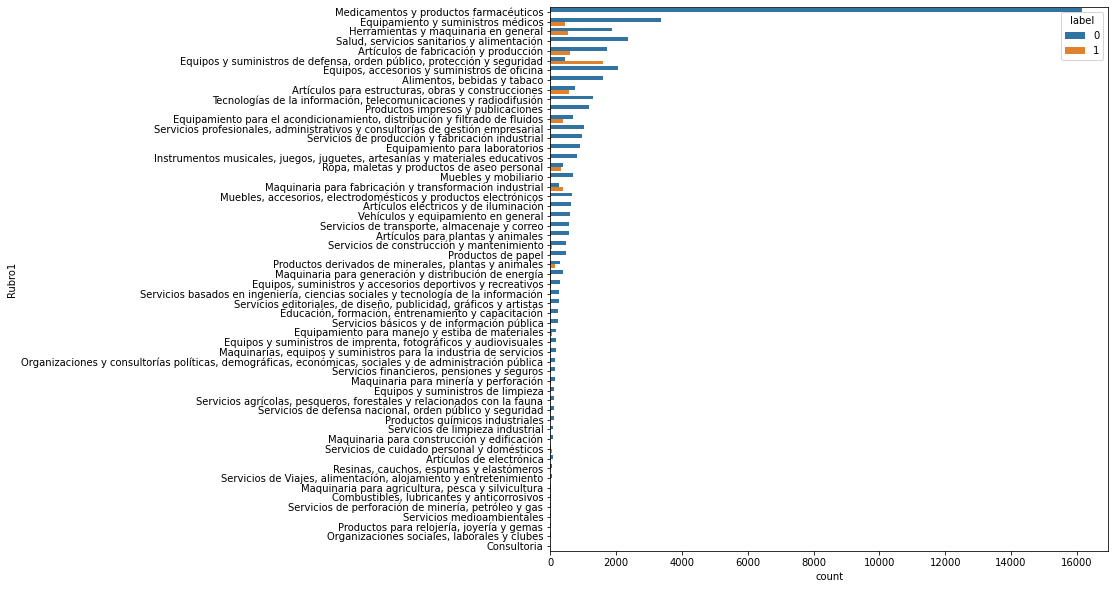

In [98]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(y= df['Rubro1'], hue=df['label'], order = df['Rubro1'].value_counts().index)

# Preprocesamiento Data

In [71]:
df.isnull().sum()

Rubro1               0
nombre_producto      0
descripcion        113
label                0
dtype: int64

In [72]:
datos_perdidos = df[df['descripcion'].isnull() == True]
datos_perdidos

,Rubro1,nombre_producto,descripcion,label
3,"Tecnologías de la información, telecomunicacio...",Software de administración,NaN,0
630,"Equipos y suministros de defensa, orden públic...",Badén reductor de velocidad (lomo de toro),NaN,0
2037,"Instrumentos musicales, juegos, juguetes, arte...",Juguetes táctiles,NaN,0
2993,Servicios de construcción y mantenimiento,"Instalación, reparación o mantenimiento de sis...",NaN,0
3541,Servicios de cuidado personal y domésticos,Servicios de mantenimiento de patios y piscinas,NaN,0
...,...,...,...,...
52705,"Servicios profesionales, administrativos y con...",Asesorías en inteligencia de negocios,NaN,0
52707,"Servicios profesionales, administrativos y con...",Capacitaciones directas en el concesionario,NaN,0
52708,"Servicios profesionales, administrativos y con...",Capacitaciones directas en el concesionario,NaN,0
53189,Productos de papel,Toallas de papel,NaN,0


In [73]:
df.dropna(axis=0, inplace = True) #Si alguna fila tiene un NaN se elimina la fila 

In [74]:
df.isnull().sum()

Rubro1             0
nombre_producto    0
descripcion        0
label              0
dtype: int64

In [75]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54849 entries, 0 to 54961
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rubro1           54849 non-null  object
 1   nombre_producto  54849 non-null  object
 2   descripcion      54849 non-null  object
 3   label            54849 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.1+ MB


In [76]:
df.drop_duplicates(keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51795 entries, 0 to 54961
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rubro1           51795 non-null  object
 1   nombre_producto  51795 non-null  object
 2   descripcion      51795 non-null  object
 3   label            51795 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


In [77]:
df2 = pd.get_dummies(df, columns=['Rubro1'] ,drop_first=True)
df2.head()

,nombre_producto,descripcion,label,Rubro1_Artículos de electrónica,Rubro1_Artículos de fabricación y producción,Rubro1_Artículos eléctricos y de iluminación,"Rubro1_Artículos para estructuras, obras y construcciones",Rubro1_Artículos para plantas y animales,"Rubro1_Combustibles, lubricantes y anticorrosivos",Rubro1_Consultoria,...,Rubro1_Servicios de limpieza industrial,"Rubro1_Servicios de perforación de minería, petróleo y gas",Rubro1_Servicios de producción y fabricación industrial,"Rubro1_Servicios de transporte, almacenaje y correo","Rubro1_Servicios editoriales, de diseño, publicidad, gráficos y artistas","Rubro1_Servicios financieros, pensiones y seguros",Rubro1_Servicios medioambientales,"Rubro1_Servicios profesionales, administrativos y consultorías de gestión empresarial","Rubro1_Tecnologías de la información, telecomunicaciones y radiodifusión",Rubro1_Vehículos y equipamiento en general
0,Equipo quirúrgico de fragmatome retinal vítreo...,CÁMARA RETINAL NO MIDRIÁTICA - ESPECIFICACIONE...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Servicios de transporte local en camión,SERVICIO DE MUDANZA DE ENSERES PROPIOS Y EN US...,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Desperdicios o restos de madera,LEÑA SECA CERTIFICADA,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marcadores,MARCADOR BLANCO PARA METALES,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Péndulos,PLOMADA,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
dist_label = df2.groupby('label').sum().T
dist_label.sort_values(1, ascending=False)


label,0,1
"Rubro1_Equipos y suministros de defensa, orden público, protección y seguridad",460.0,1605.0
Rubro1_Artículos de fabricación y producción,1726.0,602.0
"Rubro1_Artículos para estructuras, obras y construcciones",748.0,558.0
Rubro1_Herramientas y maquinaria en general,1879.0,542.0
Rubro1_Equipamiento y suministros médicos,3360.0,443.0
Rubro1_Maquinaria para fabricación y transformación industrial,275.0,394.0
"Rubro1_Equipamiento para el acondicionamiento, distribución y filtrado de fluidos",676.0,392.0
"Rubro1_Ropa, maletas y productos de aseo personal",393.0,314.0
"Rubro1_Productos derivados de minerales, plantas y animales",300.0,146.0
Rubro1_Servicios de cuidado personal y domésticos,19.0,59.0
